<a href="https://colab.research.google.com/github/Yiting916/data_analysis/blob/main/04-04.Seaborn_Visualizing%20categorical%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

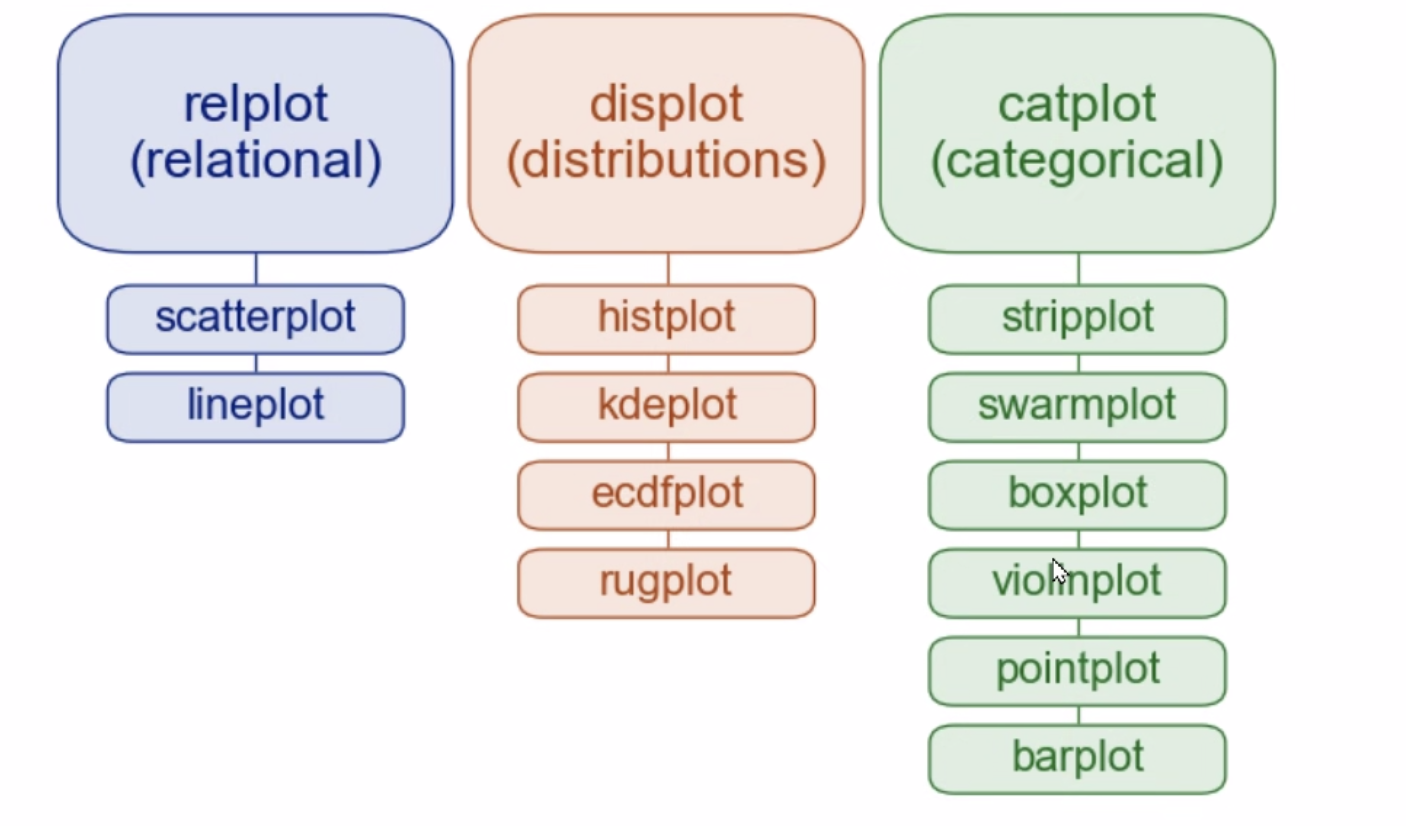

# Visualizing categorical data
* https://seaborn.pydata.org/tutorial/categorical.html

在關係圖教程中，我們了解如何使用不同的視覺表示來顯示資料集中多個變數之間的關係。在範例中，我們將重點放在主要關係是兩個數值變數之間的情況。如果主要變數之一是「分類的」（分為離散組），那麼使用更專業的視覺化方法可能會有所幫助。

在seaborn中，有幾種不同的方法可以視覺化涉及分類資料的關係。與 relplot() 和 scatterplot() 或 lineplot() 之間的關係類似，有兩種方法可以繪製這些圖。有許多軸級函數用於以不同方式繪製分類數據，還有一個圖形級介面 catplot()，它提供了對它們的統一的更高級別的存取。

將不同的分類情節類型視為屬於三個不同的系列是有幫助的，我們將在下面詳細討論。他們是：
* Categorical scatterplots:
    * stripplot() (with kind="strip"; the default)
    * swarmplot() (with kind="swarm")
* Categorical distribution plots:
    * boxplot() (with kind="box")
    * violinplot() (with kind="violin")
    * boxenplot() (with kind="boxen")
* Categorical estimate plots:
    * pointplot() (with kind="point")
    * barplot() (with kind="bar")
    * countplot() (with kind="count")

這些系列使用不同粒度等級表示資料。在決定使用哪一個時，您必須考慮要回答的問題。統一的 API 讓您可以輕鬆地在不同類型之間切換並從多個角度查看資料。
在本教程中，我們將主要關注圖形級介面 catplot()。請記住，此函數是上述每個函數的更高級別接口，因此當我們顯示每種類型的繪圖時，我們將引用它們，並保留更詳細的特定於類型的 API 文件。

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# 分類散點圖(Categorical scatterplots)
catplot() 中資料的預設表示形式使用散佈圖。 Seaborn 中其實有兩種不同的分類散佈圖。他們採用不同的方法來解決用散點圖表示分類資料的主要挑戰，即屬於一個類別的所有點都將落在與分類變數相對應的軸上的相同位置。 stripplot() 所使用的方法（catplot() 中的預設「種類」）是透過少量隨機「抖動」來調整分類軸上的點的位置：

In [ ]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


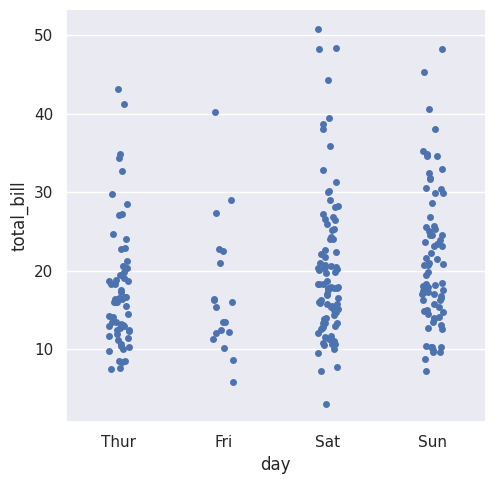

In [ ]:
# x, y 軸：一軸是數值, 另一軸是類別型
sns.catplot(data=tips, x="day", y="total_bill")
#sns.catplot(data=tips, x="day", y="total_bill", kind="swarm") # strip(default), box, boxen. 常用：swarm, violin (點太多不適合)

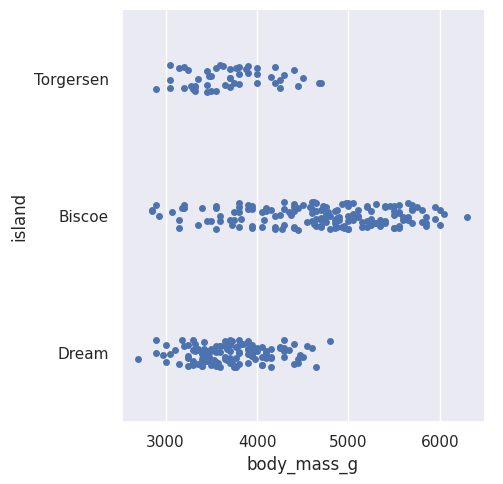

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
penguins = sns.load_dataset("penguins")
penguins.head()
sns.catplot(data=penguins, x="body_mass_g", y="island")

相同的參數如果使用前面的replot()會變成

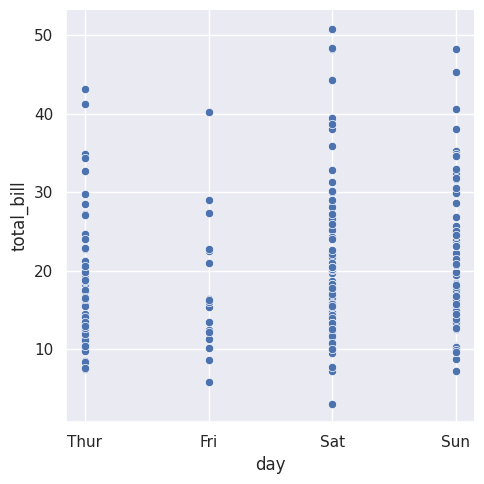

In [ ]:
sns.relplot(data=tips, x="day", y="total_bill")

↑ 我們可以發現catplot()跟relplot()最大的差別是catplot()會把資料點左右進行抖動，如此比較好視覺化的檢視資料的分布情形

jitter 參數控制抖動的幅度或完全停用它：

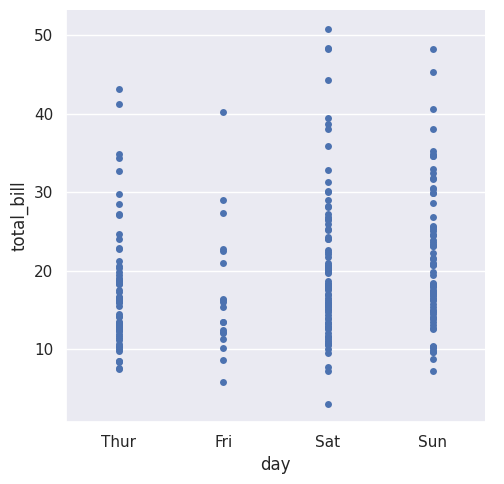

In [ ]:
sns.catplot(data=tips, x="day", y="total_bill", jitter=False)
# 等同於
#sns.relplot(data=tips, x="day", y="total_bill")

<Axes: xlabel='day', ylabel='total_bill'>

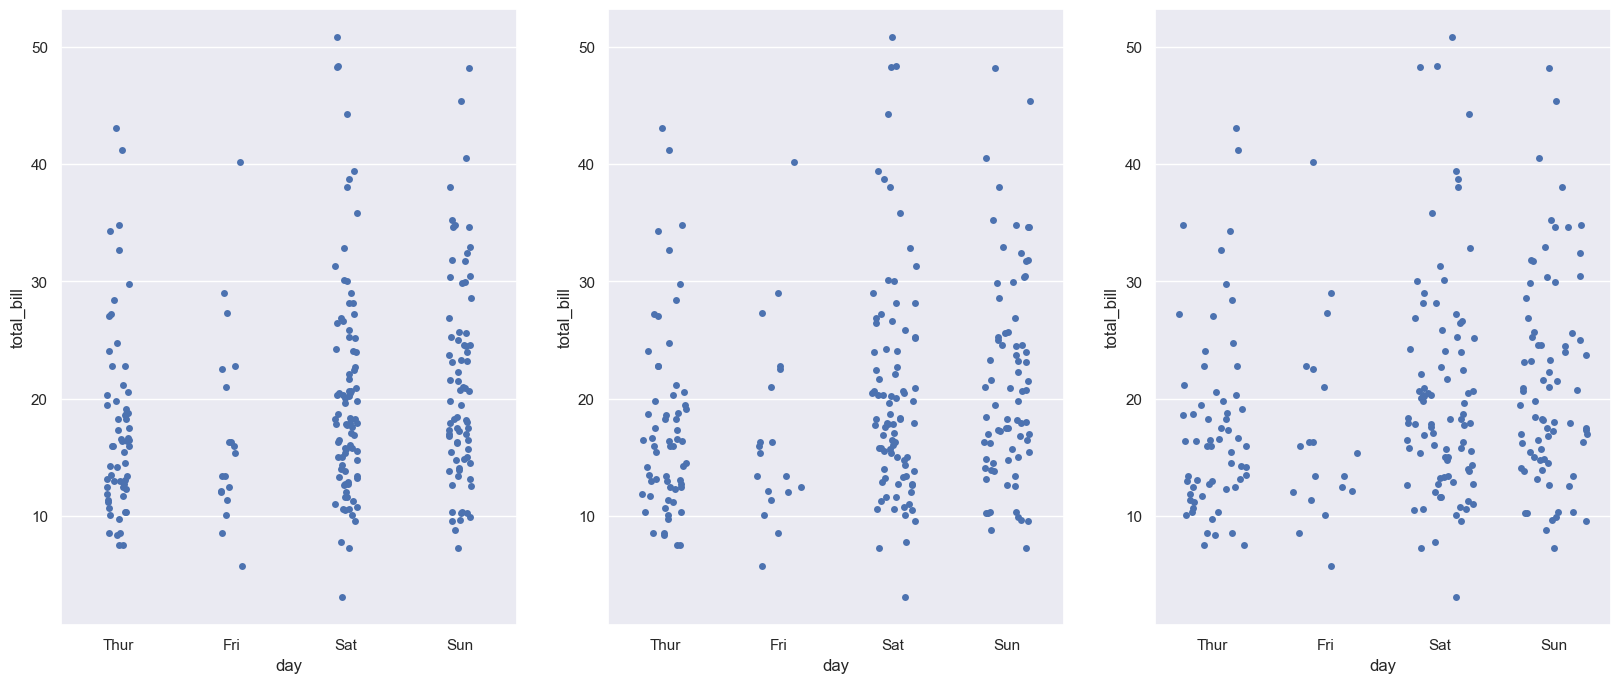

In [ ]:
# 比較不同 jitter值的擴散程度
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
#原本的教學範例是用catplot()，但是這裡為了能夠同步比較不同參數的效果區別而採用subplots()，因此必須直接使用stripplot()
sns.stripplot(data=tips, x="day", y="total_bill", jitter=0.1, ax=axes[0])
sns.stripplot(data=tips, x="day", y="total_bill", jitter=0.2, ax=axes[1])
sns.stripplot(data=tips, x="day", y="total_bill", jitter=0.3, ax=axes[2])

第二種方法使用防止點重疊的演算法來調整沿分類軸的點。它可以更好地表示觀測值的分佈，儘管它只適用於相對較小的資料集。這種圖有時被稱為“beeswarm”，在 seaborn 中透過 swarmplot() 繪製，透過在 catplot() 中設定 kind="swarm" 來啟動它：

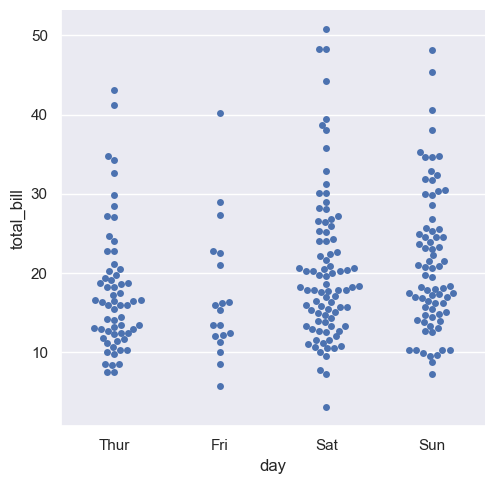

In [ ]:
sns.catplot(data=tips, x="day", y="total_bill", kind="swarm")

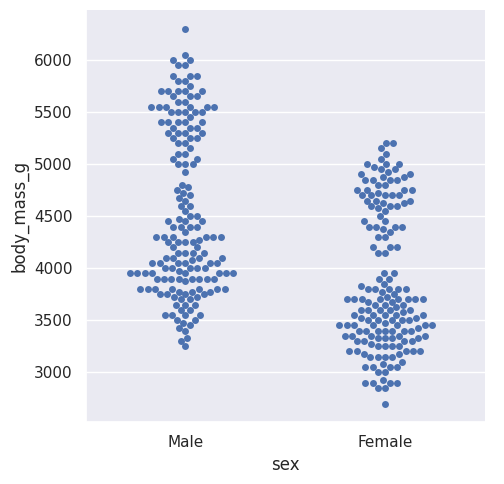

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
penguins = sns.load_dataset("penguins")
#penguins.head()
sns.catplot(penguins, x="sex", y="body_mass_g", kind="swarm")

與關係圖類似，可以使用hue為分類圖添加另一個維度。 （分類圖目前不支援size 或style這兩個參數）。每個不同的分類繪圖函數以不同的方式處理hue。對於散佈圖，只需要改變點的顏色：

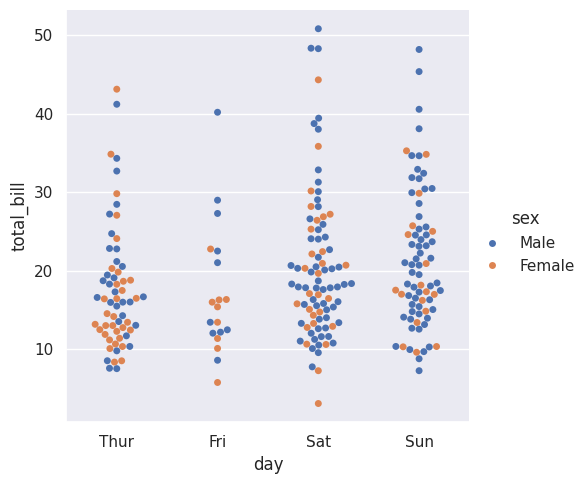

In [ ]:
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="swarm")

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
penguins = sns.load_dataset("penguins")
penguins.head()

與數值資料不同，如何沿軸排列分類變數的等級並不總是顯而易見的。一般來說，seaborn 分類繪圖函數會嘗試從資料推斷類別的順序。如果您的資料具有 pandas Categorical 資料類型，則可以在那裡設定類別的預設順序。如果傳遞到分類軸的變數看起來是數字，則層級將被排序。但是，預設情況下，即使使用數字來標記數據，數據仍被視為分類數據並在分類軸上的序數位置（特別是 0、1、...）繪製：

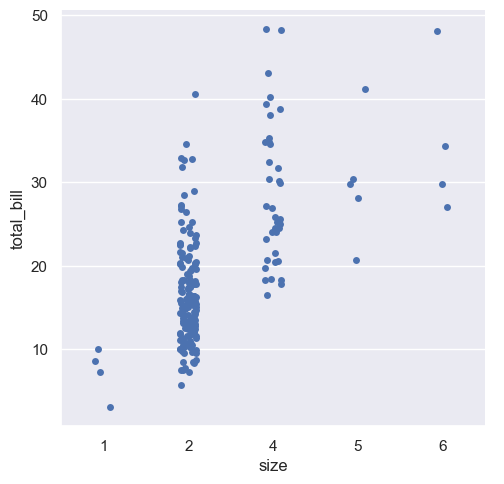

In [ ]:
sns.catplot(data=tips.query("size != 3"), x="size", y="total_bill")

從 v0.13.0 開始，所有分類繪圖函數都有一個 native_scale 參數，當您想要使用數字或日期時間資料進行分類分組而不更改基礎資料屬性時，可以將其設為 True：

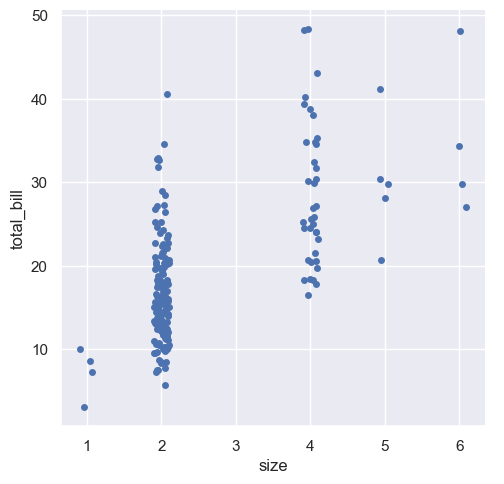

In [ ]:
sns.catplot(data=tips.query("size != 3"), x="size", y="total_bill", native_scale=True)

選擇預設排序的另一個選項是採用資料集中出現的類別層級。也可以使用 order 參數在特定於圖的基礎上控制排序。在同一個圖中繪製多個分類圖時，這可能很重要，我們將在下面看到更多內容：

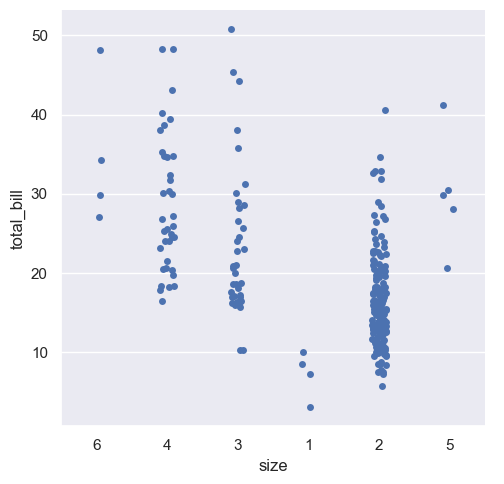

In [ ]:
sns.catplot(data=tips, x="size", y="total_bill", order=[6,4,3,1,2,5])

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
penguins = sns.load_dataset("penguins")
penguins.head()

我們提到了「分類軸」的概念。在這些範例中，它始終對應於水平軸。但將分類變數放在垂直軸上通常很有幫助（特別是當類別名稱相對較長或類別很多時）。為此，請將變數分配交換到軸：

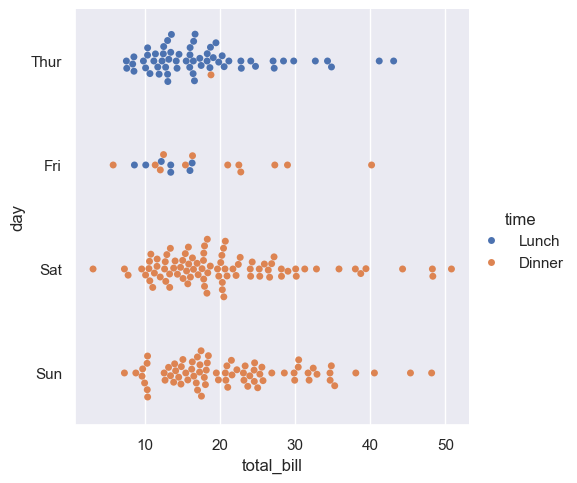

In [ ]:
sns.catplot(data=tips, x="total_bill", y="day", hue="time", kind="swarm")

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
penguins = sns.load_dataset("penguins")
penguins.head()

# 比較分佈 (Comparing distributions)
隨著資料集大小的增長，分類散點圖所能提供的有關每個類別內值分佈的資訊變得有限。發生這種情況時，有多種方法可以匯總分佈信息，以便於跨類別級別進行輕鬆比較。

## Boxplots
第一個是熟悉的 boxplot()。這種圖顯示了分佈的三個四分位數值以及極端值。 「須線」延伸至下四分位數和上四分位數 1.5 個 IQR 以內的點，然後獨立顯示超出該範圍的觀測值。這意味著箱線圖中的每個值都對應於資料中的實際觀察值。

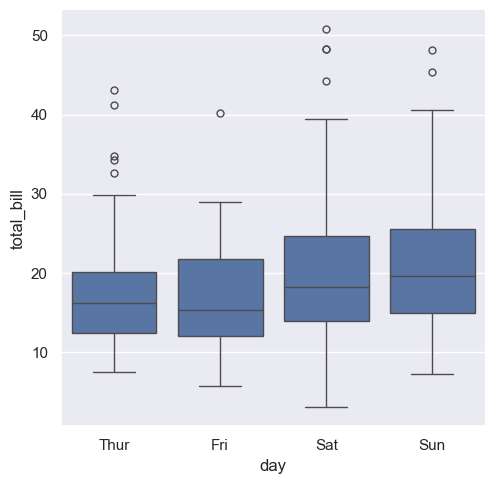

In [ ]:
sns.catplot(data=tips, x="day", y="total_bill", kind="box")

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
penguins = sns.load_dataset("penguins")
penguins.head()

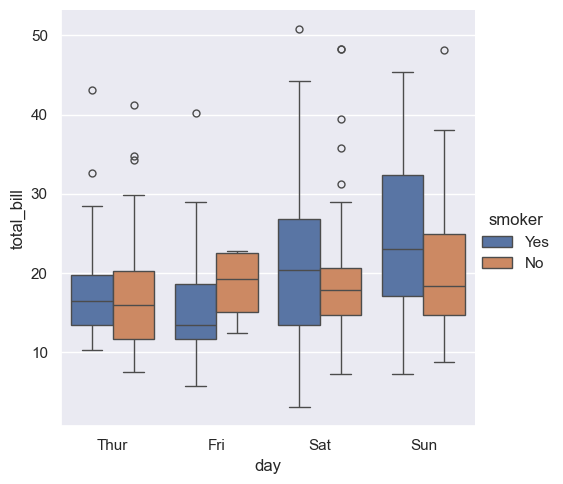

In [ ]:
# 加入hue後
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", kind="box")

In [ ]:
#問題：請分析上圖可以看出什麼情形？

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
penguins = sns.load_dataset("penguins")
penguins.head()

相關函數 boxenplot() 繪製的圖與boxplot()類似，但經過最佳化以顯示有關分佈形狀的更多資訊。它最適合較大的資料集：

In [ ]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


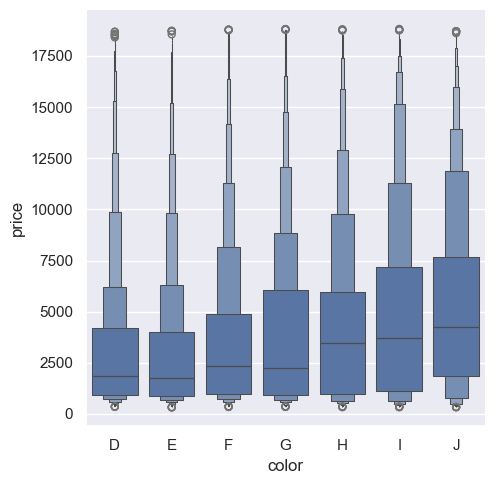

In [ ]:
sns.catplot(
    data=diamonds.sort_values("color"),
    x="color", y="price", kind="boxen",
)

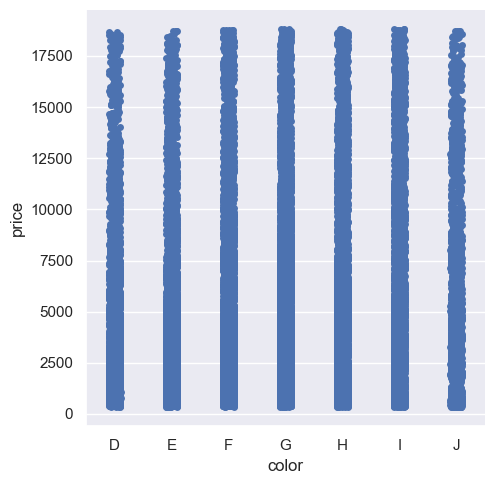

In [ ]:
# 如果不使用boxenplot(),則資料點會因為數目過多而混在一起無法辨識
sns.catplot(
    data=diamonds.sort_values("color"),
    x="color", y="price"
)

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
penguins = sns.load_dataset("penguins")
penguins.head()

# Violinplots
另一種方法是 violinplot()，它將箱線圖(boxplot)與分佈教程中描述的核密度估計(kernel density estimation, KDE)過程結合：

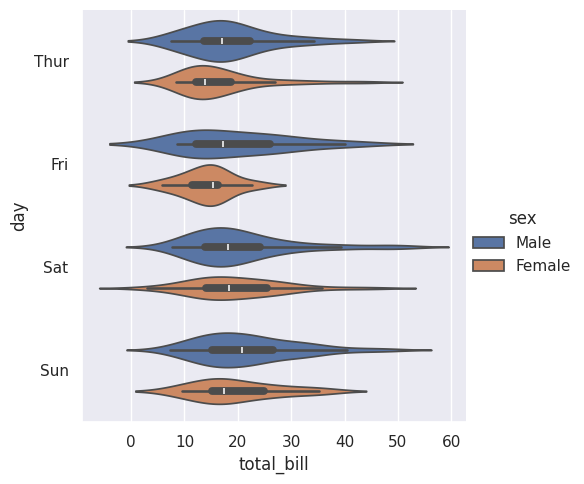

In [ ]:
sns.catplot(
    data=tips, x="total_bill", y="day", hue="sex", kind="violin",
)

In [ ]:
#問題：請分析上圖可以看出什麼情形？

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
penguins = sns.load_dataset("penguins")
penguins.head()

該方法使用核密度估計來提供對值分佈的更豐富的描述。此外，箱線圖中的四分位數和晶須值顯示在小提琴內部。缺點是，由於小提琴圖使用 KDE，因此可能需要調整一些其他參數，相對於簡單的箱型圖增加了一些複雜性：

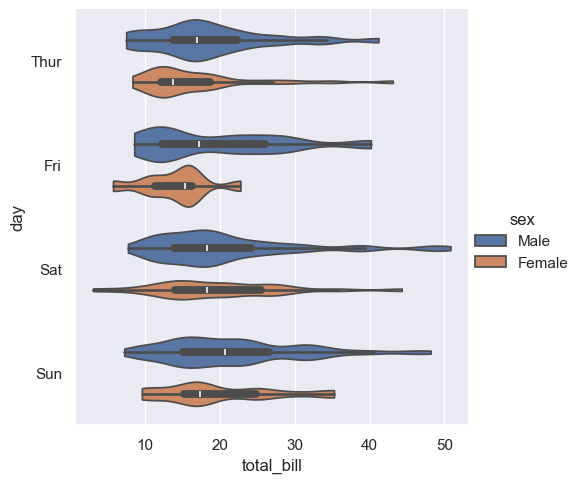

In [ ]:
sns.catplot(
    data=tips, x="total_bill", y="day", hue="sex",
    kind="violin", bw_adjust=.5, cut=0,
)

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
penguins = sns.load_dataset("penguins")
penguins.head()

還可以「拆分(split)」小提琴，這樣可以更有效地利用空間：

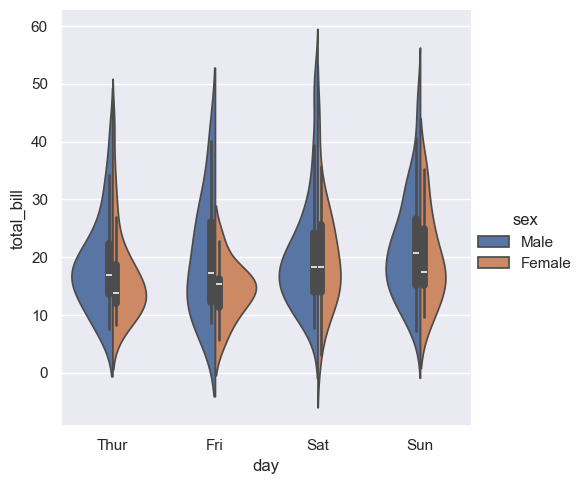

In [ ]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",
    kind="violin", split=True,
)

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
penguins = sns.load_dataset("penguins")
penguins.head()

將 swarmplot() 或 stripplot() 與箱型圖或小提琴圖結合起來顯示每個觀察值以及分佈摘要也很有用：

<Axes: xlabel='day', ylabel='total_bill'>

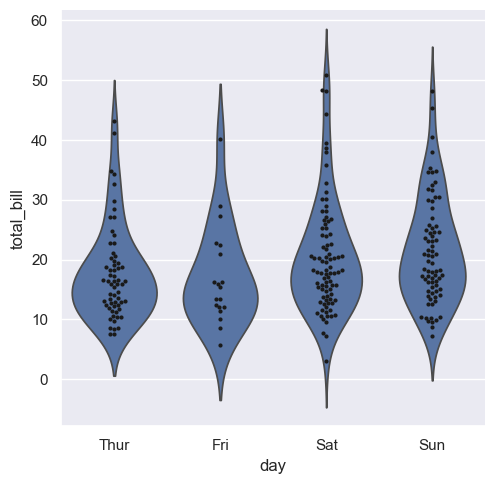

In [ ]:
g = sns.catplot(data=tips, x="day", y="total_bill", kind="violin", inner=None)
sns.swarmplot(data=tips, x="day", y="total_bill", color="k", size=3, ax=g.ax) # 疊圖的概念

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# 估計集中趨勢(Estimating central tendency)
對於其他應用程序，您可能希望顯示值的集中趨勢的估計，而不是顯示每個類別內的分佈。 Seaborn 有兩種主要方式來顯示此資訊。重要的是，這些函數的基本 API 與上面討論的函數相同。

## Bar plots
實現這一目標的一種熟悉的情節風格是條形圖。在seaborn中，barplot()函數對完整資料集進行操作並應用函數來獲得估計值（預設取平均值）。當每個類別中有多個觀測值時，它也會使用自舉來計算估計值周圍的置信區間，並使用誤差線繪製：

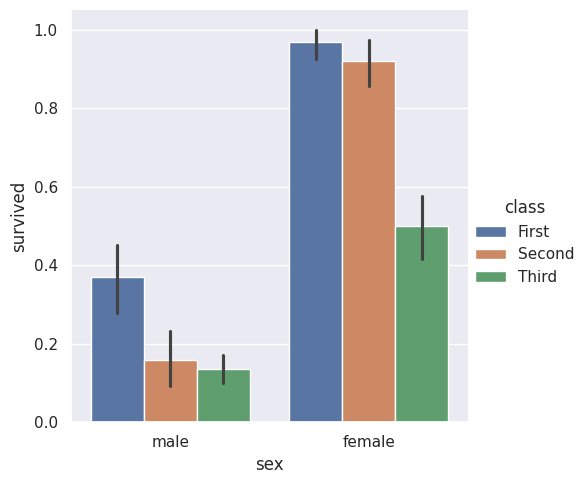

In [ ]:
titanic = sns.load_dataset("titanic")
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="bar") # barplot()函數對完整資料集進行操作並應用函數來獲得估計值（預設取平均值）

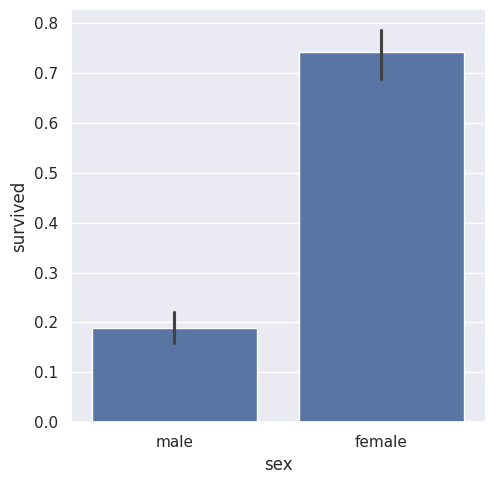

In [ ]:
# 算平均存活率
sns.catplot(data=titanic, x="sex", y="survived", kind="bar")

In [ ]:
#問題：上圖表中的黑色線條代表什麼意義？

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
penguins = sns.load_dataset("penguins")
penguins.head()

預設誤差線顯示 95% 信賴區間，但是（從 v0.12 開始），可以從許多其他表示中進行選擇：

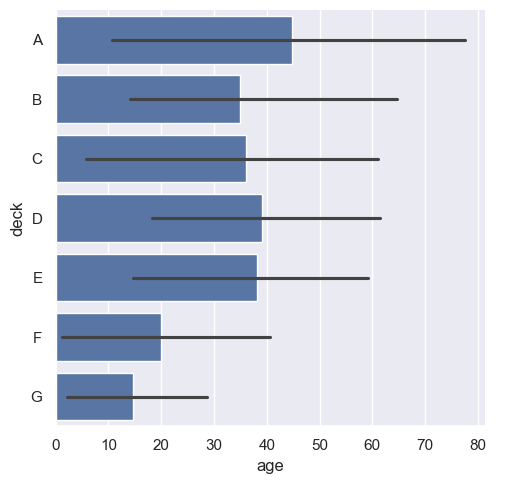

In [ ]:
sns.catplot(data=titanic, x="age", y="deck", errorbar=("pi", 95), kind="bar")

長條圖的一個特殊情況是當您想要顯示每個類別中的觀測值數量而不是計算第二個變數的統計資料時。這類似於分類變數而非定量變數的直方圖。在seaborn中，使用countplot()函數很容易做到這一點：

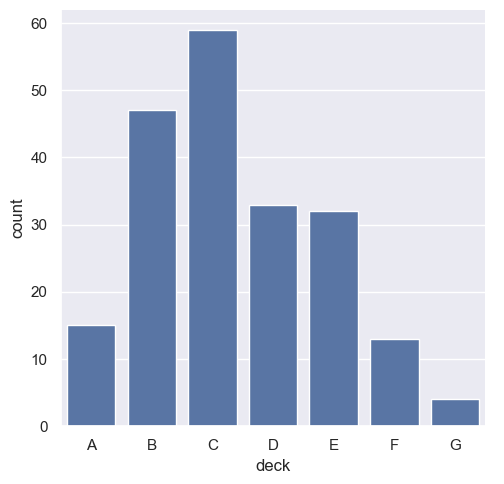

In [ ]:
sns.catplot(data=titanic, x="deck", kind="count")

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
penguins = sns.load_dataset("penguins")
penguins.head()

# Point plots
pointplot() 函數提供了另一種視覺化相同資訊的替代樣式。此函數還使用另一個軸上的高度對估計值進行編碼，但它不是顯示完整的長條圖，而是繪製點估計值和置信區間。此外，pointplot() 連接來自相同hue類別的點。這樣可以很容易地看到主要關係如何隨著hue的變化而變化，因為你的眼睛非常善於發現斜率的差異：

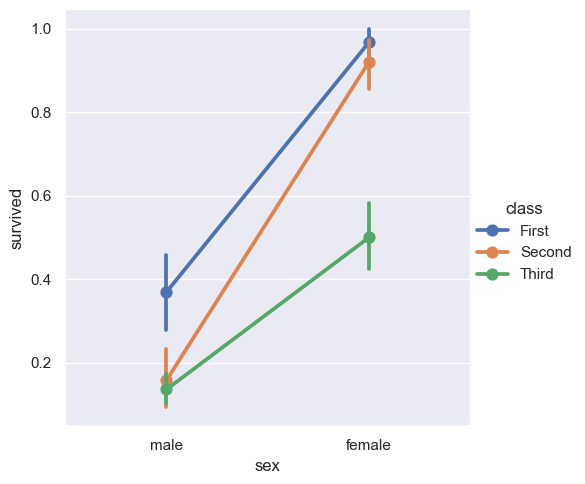

In [ ]:
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="point")

In [ ]:
#問題：請分析上圖可以看出什麼情形？

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
penguins = sns.load_dataset("penguins")
penguins.head()

雖然分類函數缺乏關係函數的樣式語義，但改變標記和/或線條樣式以及色調以使圖形最大程度地易於訪問並以黑白方式再現良好仍然是一個好主意：

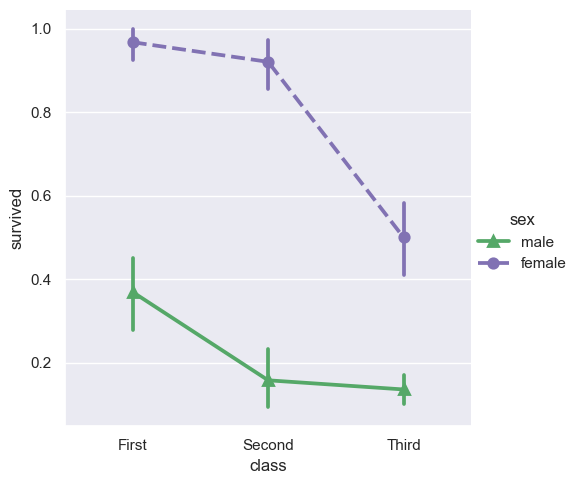

In [ ]:
sns.catplot(
    data=titanic, x="class", y="survived", hue="sex",
    palette={"male": "g", "female": "m"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)

# 顯示附加維度(Showing additional dimensions)
就像 relplot() 一樣，catplot() 建構在 FacetGrid 上這一事實意味著可以輕鬆添加分面變數來視覺化更高維度的關係：

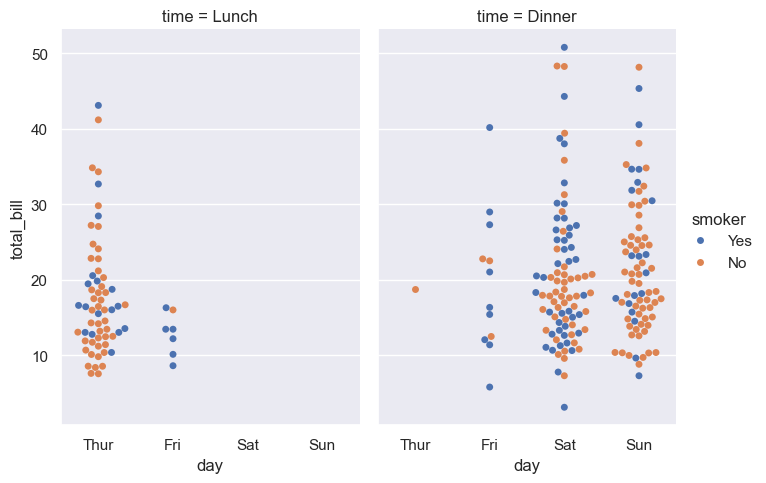

In [ ]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="smoker",
    kind="swarm", col="time", aspect=.7,
)

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
penguins = sns.load_dataset("penguins")
penguins.head()

若要進一步自訂繪圖，您可以使用它傳回的 FacetGrid 物件上的方法：

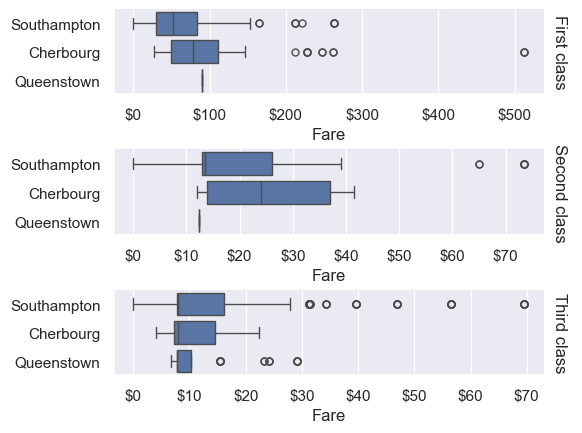

In [ ]:
g = sns.catplot(
    data=titanic,
    x="fare", y="embark_town", row="class",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="Fare", ylabel="")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')